In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Utils import *
from Evaluation import *
from Classes import ABQuadrupel
import matplotlib.pyplot as plt
from pathlib import Path
import os
import pandas as pd

# Hefekulturen

## Define Files to Evaluate

Please edit the path to the reference plate (`path_to_reference_plate`) and experiment plate (`path_to_experiment_plate`) as well as the folder to save the results to (`save_results_folder`)

In [3]:
path_to_reference_plate = r"./Data/36_MPA_ref_d3.JPG"
path_to_experiment_plate = r"./Data/36_MPA_Cu0_d3.JPG"
save_results_folder = "./Results/"

In [4]:
# IMG_SIZE = 8
MIN_COLONY_SIZE = 250
P_VALUE_NULLHYPOTHESIS = 0.01

In [5]:
os.makedirs(save_results_folder, exist_ok=True)

## Open and Preprocess Images

### Open Images as Binary

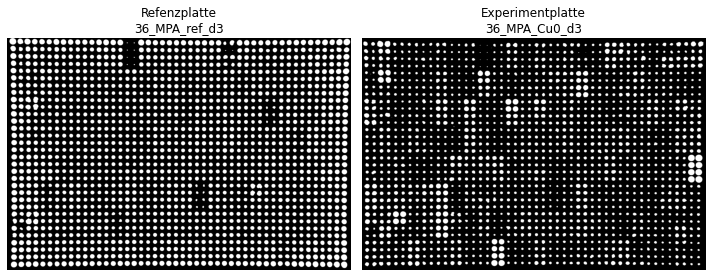

In [6]:
reference_plate = open_image(path_to_reference_plate)
experiment_plate = open_image(path_to_experiment_plate)

fig, axs = plt.subplots(1,2, figsize = (10,10*2))
axs[0].imshow(reference_plate, cmap="gray")
axs[1].imshow(experiment_plate, cmap="gray")
axs[0].set_title("Refenzplatte\n"+Path(path_to_reference_plate).stem)
axs[1].set_title("Experimentplatte\n"+Path(path_to_experiment_plate).stem)
axs[0].set_axis_off()
axs[1].set_axis_off()
plt.tight_layout()
plt.show()

### Compute Colony Sizes

Hint: if grid is not working properly, try to increase/decrease `erosion_iterations` by $\pm 1$

In [7]:
erosion_iterations = 4

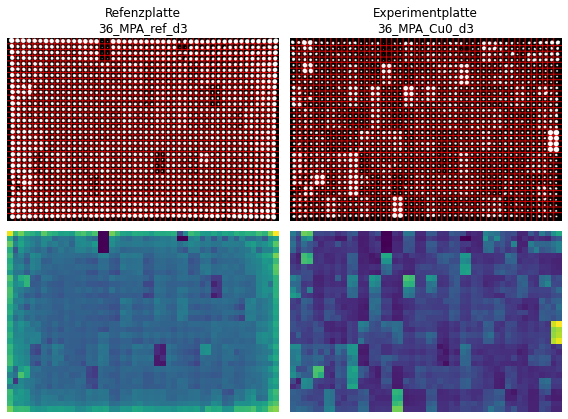

In [8]:
rgb_grid_reference, xmins_idx_reference, ymins_idx_reference = compute_grid(reference_plate, erosion_iterations = erosion_iterations)
rgb_grid_experiment, xmins_idx_experiment, ymins_idx_experiment = compute_grid(experiment_plate, erosion_iterations = erosion_iterations)

sizes_reference,_,_,_,_ = compute_sizes(reference_plate, xmins_idx_reference, ymins_idx_reference)
sizes_experiment, x_start, x_end, y_start, y_end = compute_sizes(experiment_plate, xmins_idx_experiment, ymins_idx_experiment)

fig, axs = plt.subplots(2,2, figsize = (4*2,4*1.5))
axs[0,0].imshow(rgb_grid_reference)
axs[0,1].imshow(rgb_grid_experiment)
axs[0,0].set_title("Refenzplatte\n"+Path(path_to_reference_plate).stem)
axs[0,1].set_title("Experimentplatte\n"+Path(path_to_experiment_plate).stem)
axs[0,0].set_axis_off()
axs[0,1].set_axis_off()

axs[1,0].imshow(sizes_reference) #, cmap= "plasma")
axs[1,1].imshow(sizes_experiment) #, cmap= "plasma")
axs[1,0].set_axis_off()
axs[1,1].set_axis_off()
plt.tight_layout()
plt.autoscale(False)
plt.show()

## Evaluate
- Normalize experimental plate in relation to reference plate
- Find invalid quadruples
- Find siginificant differences between row A and row B
- Find quadruple where either all colonies of the row A quadruple or all colonies of the row B quadruple is larger than median of reference plate
- Saves .pdf into results folder with images

**Open questions: Currently sizes > median of reference plate but probably mean growth of quadruple > than mean growth of corresponting quadruple on the reference plate?**

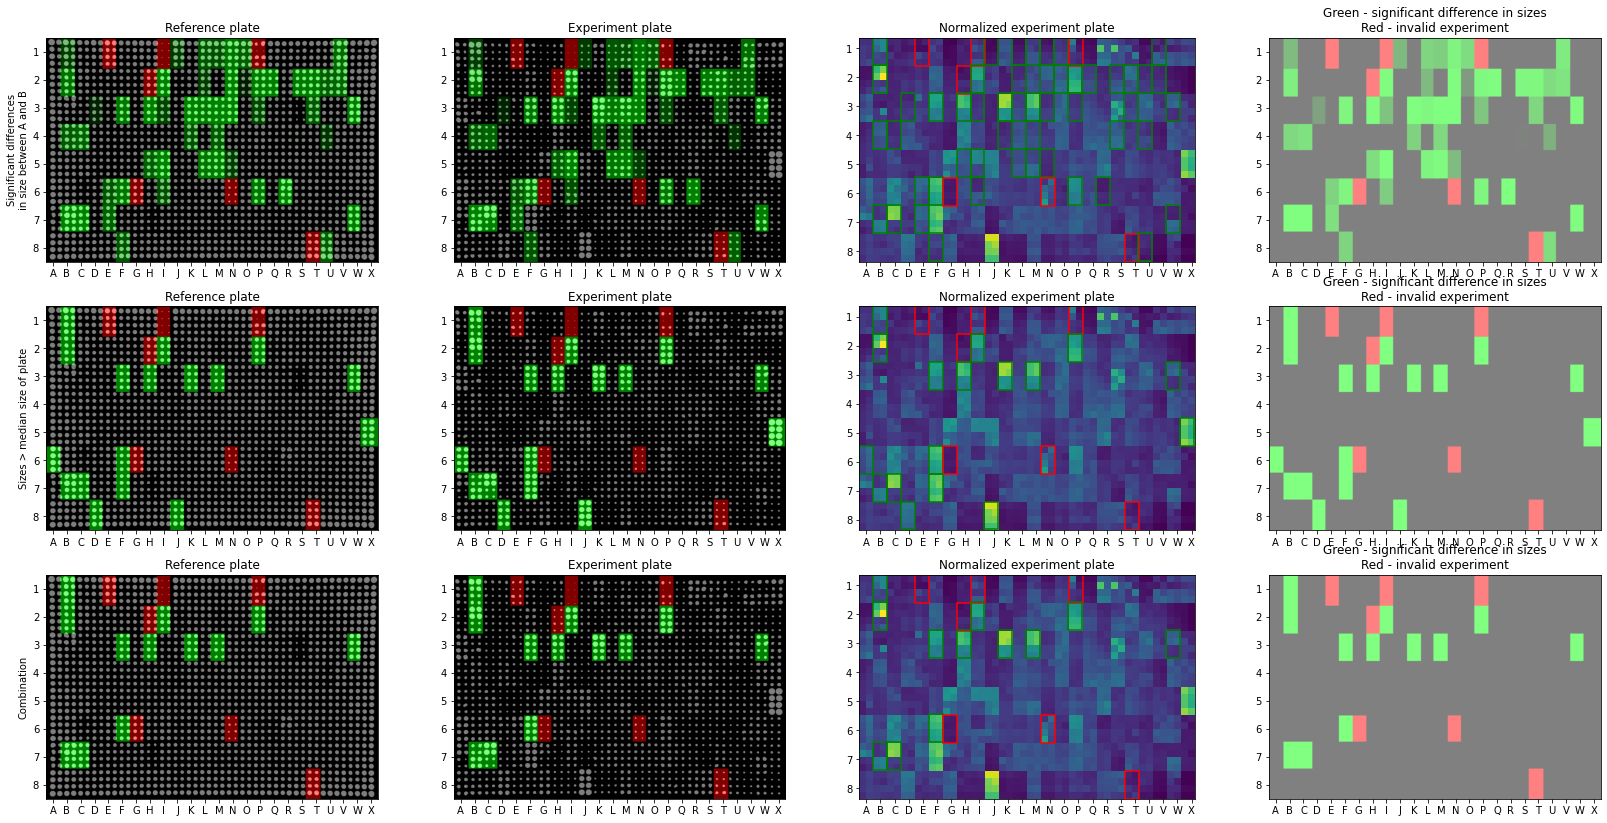

In [9]:
quadruples = evaluate(experiment_plate, reference_plate, sizes_experiment, sizes_reference, x_start, x_end, y_start, y_end, MIN_COLONY_SIZE, P_VALUE_NULLHYPOTHESIS, log_dir = save_results_folder+"/results.pdf")

## Save Data to Excel Sheet

In [10]:

data = {'position': [quad.position[1]+" "+quad.position[0] for quad in quadruples], 
        'name': [str(quad.name) for quad in quadruples], 
        'p-value': [quad.p_value for quad in quadruples], 
        'bigger than median': [quad.bigger_than_median for quad in quadruples],
        'is valid' : [quad.is_valid for quad in quadruples], 
        'sizes A': [str(quad.quadrupelA.sizes) for quad in quadruples], 
        'sizes B': [str(quad.quadrupelB.sizes) for quad in quadruples]}
df = pd.DataFrame(data=data)    
df = df.sort_values(by=['p-value'])
df.to_excel(save_results_folder+"/Result_"+str(Path(path_to_experiment_plate).stem)+".xlsx")
df

,position,name,p-value,bigger than median,is valid,sizes A,sizes B
146,C 7,,6.091434e-08,True,True,[1.91666667 1.8933121 1.97390572 1.89836661],[0.54907975 0.5508831 0.49883268 0.43582641]
104,I 5,,3.864514e-07,False,True,[1.16314779 1.1008991 1.11737629 1.11658654],[0.61018298 0.55922643 0.58169376 0.63333333]
145,B 7,,3.187251e-06,True,True,[0.44259567 0.5426009 0.43254818 0.49691675],[1.06517446 1.09717186 1.00387097 1.07935342]
58,K 3,,5.859062e-06,True,True,[2.03507271 2.0502693 2.04708098 1.92363636],[1.27288579 1.26635945 1.28808594 1.20845624]
60,M 3,,3.884849e-05,True,True,[1.6717412 1.79272326 1.68181818 1.8106267 ],[1.2300885 1.26636569 1.1109375 1.1418637 ]
...,...,...,...,...,...,...,...
143,X 6,,8.768120e-01,False,True,[0.26646526 0.31764123 0.39971449 0.22737069],[0.29408319 0.29187563 0.29266409 0.30738178]
5,F 1,,8.980843e-01,False,True,[0.45005258 0.51906318 0.61769352 0.39716903],[0.4908953 0.52559415 0.4808836 0.45930701]
47,X 2,,9.125589e-01,False,True,[0.21921308 0.14957594 0.20574443 0.15017986],[0.20817439 0.14385246 0.22565598 0.15926236]
77,F 4,,9.160754e-01,False,True,[0.38261649 0.40708812 0.37961336 0.38447147],[0.42883895 0.38333333 0.35883905 0.37549407]
